In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
import random
import os
from scipy.ndimage import rotate

import albumentations as A


In [5]:
images_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/images/' #path to original images
masks_path = 'D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/masks/'
img_augmented_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/aug_images/' # path to store aumented images
msk_augmented_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/aug_masks/' # path to store aumented images
images=[] # to store paths of images from folder
masks=[]

In [6]:
for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

for msk in os.listdir(masks_path):  # read image name from folder and append its path into "images" array     
    masks.append(os.path.join(masks_path,msk))

In [23]:
print(images[20])

D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/images/image_118.npy


In [8]:
combined_x=np.load(images[0])

In [9]:
print(combined_x[:,:,0, 0].shape)

(128, 128)


In [24]:
print(masks[20])

D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/masks/mask_118.npy


In [25]:
mask=np.load(masks[20])
mask = np.argmax(mask, axis=3)
mask=mask.astype(np.uint8)

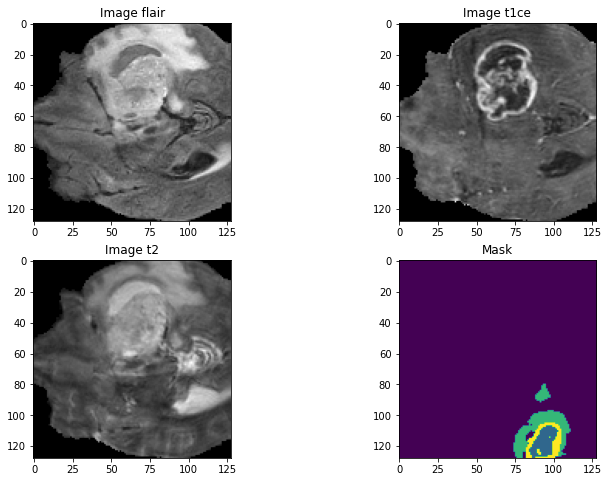

In [27]:
n_slice=50

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.savefig('flair.jpg')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [17]:
np.savetxt('flair.csv', combined_x[:,:,0, 0], delimiter=',')

In [21]:
combined_x[:,:,0, 0].shape

(128, 128)

In [29]:
np.savetxt('mask.csv', mask[:,:,50], delimiter=',')

# Saving Image using CV2

In [60]:
img_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'

In [63]:
import cv2
import nibabel as nib

img = nib.load(img_path)
img = (img.get_fdata())[:,:,:]
# img = (img/img.max())*255
img = img.astype(np.uint8)
img.shape

for i in range(13,141):
    filename = "test/images/flair/"+str(i-13)+".png"
    gray_img = img[56:184,56:184,i]
    #color_img = np.expand_dims(gray_img, 3)
    #color_img = np.concatenate([color_img, color_img, color_img], 2)

#     # COLOR LABELING
#     #c255 = np.expand_dims(np.ones(gray_img.shape)*255, 3)
#     #c0 = np.expand_dims(np.zeros(gray_img.shape), 3)
#     #color = np.concatenate([c0,c0,c255], 2)
#     #color_img = color_img.astype(np.float32) + color
#     #color_img = (color_img / color_img.max()) *255

    cv2.imwrite(filename, gray_img)

In [68]:
img_path2= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii'

In [69]:
import nibabel as nib

img = nib.load(img_path2)
img = (img.get_fdata())[:,:,:]
# img = (img/img.max())*255
img = img.astype(np.uint8)
img.shape

for i in range(13,141):
    filename = "test/images/t1ce/"+str(i-13)+".png"
    gray_img = img[56:184,56:184,i]
    #color_img = np.expand_dims(gray_img, 3)
    #color_img = np.concatenate([color_img, color_img, color_img], 2)

#     # COLOR LABELING
#     #c255 = np.expand_dims(np.ones(gray_img.shape)*255, 3)
#     #c0 = np.expand_dims(np.zeros(gray_img.shape), 3)
#     #color = np.concatenate([c0,c0,c255], 2)
#     #color_img = color_img.astype(np.float32) + color
#     #color_img = (color_img / color_img.max()) *255

    cv2.imwrite(filename, gray_img)

In [70]:
img_path3= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii'

In [71]:
import nibabel as nib

img = nib.load(img_path3)
img = (img.get_fdata())[:,:,:]
img.max()
img = img.astype(np.uint8)
img.shape

for i in range(13,141):
    filename = "test/images/t2/"+str(i-13)+".png"
    gray_img = img[56:184,56:184,i]

    cv2.imwrite(filename, gray_img)

In [58]:
import matplotlib.image

for i in range(128):
    matplotlib.image.imsave('test/masks/mask'+str(i)+'.png', mask[:,:,i])

# Check the shape of saved image

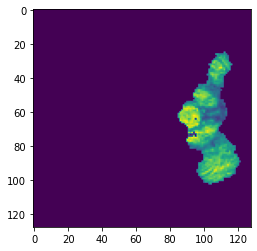

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
flair = mpimg.imread('test/images/flair/0.png')

# Output Images
plt.imshow(flair)

In [32]:
mask = mpimg.imread('test/masks/mask0.png')
mask.shape

(128, 128, 4)

In [3]:
flair.shape

(128, 128)

In [37]:
mask.shape

(128, 128, 4)

In [30]:
flair.max()

0.9882353

In [11]:
np.savetxt('flairnew.csv', flair, delimiter=',')

In [34]:
np.savetxt('masknew.csv',mask[:,:,0], delimiter=',')

# Augmentation

In [82]:
images_to_generate=128

images_path='test/images/t2/' #path to original images
images_path1='test/images/flair/' #path to original images
images_path2='test/images/t1ce/' #path to original images
masks_path = 'test/masks/'
img_augmented_path='test/aug_images/t2/' # path to store aumented images
img_augmented_path1='test/aug_images/flair/' # path to store aumented images
img_augmented_path2='test/aug_images/t1ce/' # path to store aumented images
msk_augmented_path='test/aug_masks/' # path to store aumented images
images=[] # to store paths of images from folder
images1=[] # to store paths of images from folder
images2=[] # to store paths of images from folder
masks=[]

In [83]:
for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

for im in os.listdir(images_path1):  # read image name from folder and append its path into "images" array     
    images1.append(os.path.join(images_path1,im))
     
for im in os.listdir(images_path2):  # read image name from folder and append its path into "images" array     
    images2.append(os.path.join(images_path2,im))
    

for msk in os.listdir(masks_path):  # read image name from folder and append its path into "images" array     
    masks.append(os.path.join(masks_path,msk))

In [84]:
aug = A.Compose([
    A.VerticalFlip(p=0.5),              
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=1),
    A.Transpose(p=1),
    #A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    A.GridDistortion(p=1)
    ],
    additional_targets={'image1': 'image', 'image2': 'image'}
)

In [85]:
i=1   # variable to iterate till images_to_generate
import cv2

while i<=images_to_generate: 
    number = random.randint(0, len(images)-1)  #PIck a number to select an image & mask
    image = images[number]
    image1 = images1[number]
    image2 = images2[number]
    mask = masks[number]
    print(image, mask)
    print(image1, mask)
    print(image2, mask)
    #image=random.choice(images) #Randomly select an image name
    original_image = cv2.imread(image)
    original_image1 = cv2.imread(image1)
    original_image2 = cv2.imread(image2)
    original_mask = cv2.imread(mask)
    
    aug_input={"image":original_image, "image2":original_image2,"image1":original_image1, "mask":original_mask}
    augmented = aug(**aug_input)
    transformed_image = augmented['image']
    transformed_image1 = augmented['image1']
    transformed_image2 = augmented['image2']
    transformed_mask = augmented['mask']

        
    new_image_path= "%s/augmented_image_%s.png" %(img_augmented_path, i)
    new_image_path1= "%s/augmented_image_%s.png" %(img_augmented_path1, i)
    new_image_path2= "%s/augmented_image_%s.png" %(img_augmented_path2, i)
    new_mask_path = "%s/augmented_mask_%s.png" %(msk_augmented_path, i)
    io.imsave(new_image_path, transformed_image)
    io.imsave(new_image_path1, transformed_image)
    io.imsave(new_image_path2, transformed_image2)
    io.imsave(new_mask_path, transformed_mask)
    i =i+1

test/images/t2/112.png test/masks/mask112.png
test/images/flair/112.png test/masks/mask112.png
test/images/t1ce/112.png test/masks/mask112.png
test/images/t2/65.png test/masks/mask65.png
test/images/flair/65.png test/masks/mask65.png
test/images/t1ce/65.png test/masks/mask65.png
test/images/t2/44.png test/masks/mask44.png
test/images/flair/44.png test/masks/mask44.png
test/images/t1ce/44.png test/masks/mask44.png
test/images/t2/24.png test/masks/mask24.png
test/images/flair/24.png test/masks/mask24.png
test/images/t1ce/24.png test/masks/mask24.png
test/images/t2/106.png test/masks/mask106.png
test/images/flair/106.png test/masks/mask106.png
test/images/t1ce/106.png test/masks/mask106.png
test/images/t2/122.png test/masks/mask122.png
test/images/flair/122.png test/masks/mask122.png
test/images/t1ce/122.png test/masks/mask122.png
test/images/t2/110.png test/masks/mask110.png
test/images/flair/110.png test/masks/mask110.png
test/images/t1ce/110.png test/masks/mask110.png
test/images/t2/9.

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_1.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_2.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_5.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_6.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_7.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_8.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/63.png test/masks/mask63.png
test/images/flair/63.png test/masks/mask63.png
test/images/t1ce/63.png test/masks/mask63.png
test/images/t2/17.png test/masks/mask17.png
test/images/flair/17.png test/masks/mask17.png
test/images/t1ce/17.png test/masks/mask17.png
test/images/t2/48.png test/masks/mask48.png
test/images/flair/48.png test/masks/mask48.png
test/images/t1ce/48.png test/masks/mask48.png
test/images/t2/44.png test/masks/mask44.png
test/images/flair/44.png test/masks/mask44.png
test/images/t1ce/44.png test/masks/mask44.png
test/images/t2/77.png test/masks/mask77.png
test/images/flair/77.png test/masks/mask77.png
test/images/t1ce/77.png test/masks/mask77.png
test/images/t2/18.png test/masks/mask18.png
test/images/flair/18.png test/masks/mask18.png
test/images/t1ce/18.png test/masks/mask18.png
test/images/t2/85.png test/masks/mask85.png
test/images/flair/85.png test/masks/mask85.png
test/images/t1ce/85.png test/masks/mask85.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_9.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_13.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_15.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_16.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/71.png test/masks/mask71.png
test/images/flair/71.png test/masks/mask71.png
test/images/t1ce/71.png test/masks/mask71.png
test/images/t2/108.png test/masks/mask108.png
test/images/flair/108.png test/masks/mask108.png
test/images/t1ce/108.png test/masks/mask108.png
test/images/t2/80.png test/masks/mask80.png
test/images/flair/80.png test/masks/mask80.png
test/images/t1ce/80.png test/masks/mask80.png
test/images/t2/108.png test/masks/mask108.png
test/images/flair/108.png test/masks/mask108.png
test/images/t1ce/108.png test/masks/mask108.png
test/images/t2/64.png test/masks/mask64.png
test/images/flair/64.png test/masks/mask64.png
test/images/t1ce/64.png test/masks/mask64.png
test/images/t2/2.png test/masks/mask2.png
test/images/flair/2.png test/masks/mask2.png
test/images/t1ce/2.png test/masks/mask2.png
test/images/t2/76.png test/masks/mask76.png
test/images/flair/76.png test/masks/mask76.png
test/images/t1ce/76.png test/masks/mask76.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_17.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_18.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_19.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_20.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_21.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_22.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks/

test/images/t2/84.png test/masks/mask84.png
test/images/flair/84.png test/masks/mask84.png
test/images/t1ce/84.png test/masks/mask84.png
test/images/t2/26.png test/masks/mask26.png
test/images/flair/26.png test/masks/mask26.png
test/images/t1ce/26.png test/masks/mask26.png
test/images/t2/68.png test/masks/mask68.png
test/images/flair/68.png test/masks/mask68.png
test/images/t1ce/68.png test/masks/mask68.png
test/images/t2/81.png test/masks/mask81.png
test/images/flair/81.png test/masks/mask81.png
test/images/t1ce/81.png test/masks/mask81.png
test/images/t2/117.png test/masks/mask117.png
test/images/flair/117.png test/masks/mask117.png
test/images/t1ce/117.png test/masks/mask117.png
test/images/t2/4.png test/masks/mask4.png
test/images/flair/4.png test/masks/mask4.png
test/images/t1ce/4.png test/masks/mask4.png
test/images/t2/0.png test/masks/mask0.png
test/images/flair/0.png test/masks/mask0.png
test/images/t1ce/0.png test/masks/mask0.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_25.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_26.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_27.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_28.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_29.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_30.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks/

test/images/t2/96.png test/masks/mask96.png
test/images/flair/96.png test/masks/mask96.png
test/images/t1ce/96.png test/masks/mask96.png
test/images/t2/36.png test/masks/mask36.png
test/images/flair/36.png test/masks/mask36.png
test/images/t1ce/36.png test/masks/mask36.png
test/images/t2/66.png test/masks/mask66.png
test/images/flair/66.png test/masks/mask66.png
test/images/t1ce/66.png test/masks/mask66.png
test/images/t2/28.png test/masks/mask28.png
test/images/flair/28.png test/masks/mask28.png
test/images/t1ce/28.png test/masks/mask28.png
test/images/t2/41.png test/masks/mask41.png
test/images/flair/41.png test/masks/mask41.png
test/images/t1ce/41.png test/masks/mask41.png
test/images/t2/88.png test/masks/mask88.png
test/images/flair/88.png test/masks/mask88.png
test/images/t1ce/88.png test/masks/mask88.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_35.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_36.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_37.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_39.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/68.png test/masks/mask68.png
test/images/flair/68.png test/masks/mask68.png
test/images/t1ce/68.png test/masks/mask68.png
test/images/t2/91.png test/masks/mask91.png
test/images/flair/91.png test/masks/mask91.png
test/images/t1ce/91.png test/masks/mask91.png
test/images/t2/53.png test/masks/mask53.png
test/images/flair/53.png test/masks/mask53.png
test/images/t1ce/53.png test/masks/mask53.png
test/images/t2/62.png test/masks/mask62.png
test/images/flair/62.png test/masks/mask62.png
test/images/t1ce/62.png test/masks/mask62.png
test/images/t2/33.png test/masks/mask33.png
test/images/flair/33.png test/masks/mask33.png
test/images/t1ce/33.png test/masks/mask33.png
test/images/t2/117.png test/masks/mask117.png
test/images/flair/117.png test/masks/mask117.png
test/images/t1ce/117.png test/masks/mask117.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_41.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_42.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_43.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_46.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_47.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/83.png test/masks/mask83.png
test/images/flair/83.png test/masks/mask83.png
test/images/t1ce/83.png test/masks/mask83.png
test/images/t2/13.png test/masks/mask13.png
test/images/flair/13.png test/masks/mask13.png
test/images/t1ce/13.png test/masks/mask13.png
test/images/t2/44.png test/masks/mask44.png
test/images/flair/44.png test/masks/mask44.png
test/images/t1ce/44.png test/masks/mask44.png
test/images/t2/25.png test/masks/mask25.png
test/images/flair/25.png test/masks/mask25.png
test/images/t1ce/25.png test/masks/mask25.png
test/images/t2/102.png test/masks/mask102.png
test/images/flair/102.png test/masks/mask102.png
test/images/t1ce/102.png test/masks/mask102.png
test/images/t2/11.png test/masks/mask11.png
test/images/flair/11.png test/masks/mask11.png
test/images/t1ce/11.png test/masks/mask11.png
test/images/t2/102.png test/masks/mask102.png
test/images/flair/102.png test/masks/mask102.png
test/images/t1ce/102.png test/masks/mask102.png
test/images/t2/94.png test/ma

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_48.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_49.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_50.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_52.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_53.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/24.png test/masks/mask24.png
test/images/flair/24.png test/masks/mask24.png
test/images/t1ce/24.png test/masks/mask24.png
test/images/t2/55.png test/masks/mask55.png
test/images/flair/55.png test/masks/mask55.png
test/images/t1ce/55.png test/masks/mask55.png
test/images/t2/17.png test/masks/mask17.png
test/images/flair/17.png test/masks/mask17.png
test/images/t1ce/17.png test/masks/mask17.png
test/images/t2/111.png test/masks/mask111.png
test/images/flair/111.png test/masks/mask111.png
test/images/t1ce/111.png test/masks/mask111.png
test/images/t2/33.png test/masks/mask33.png
test/images/flair/33.png test/masks/mask33.png
test/images/t1ce/33.png test/masks/mask33.png
test/images/t2/98.png test/masks/mask98.png
test/images/flair/98.png test/masks/mask98.png
test/images/t1ce/98.png test/masks/mask98.png
test/images/t2/98.png test/masks/mask98.png
test/images/flair/98.png test/masks/mask98.png
test/images/t1ce/98.png test/masks/mask98.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_55.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_57.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_59.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_60.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_61.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/98.png test/masks/mask98.png
test/images/flair/98.png test/masks/mask98.png
test/images/t1ce/98.png test/masks/mask98.png
test/images/t2/99.png test/masks/mask99.png
test/images/flair/99.png test/masks/mask99.png
test/images/t1ce/99.png test/masks/mask99.png
test/images/t2/97.png test/masks/mask97.png
test/images/flair/97.png test/masks/mask97.png
test/images/t1ce/97.png test/masks/mask97.png
test/images/t2/101.png test/masks/mask101.png
test/images/flair/101.png test/masks/mask101.png
test/images/t1ce/101.png test/masks/mask101.png
test/images/t2/40.png test/masks/mask40.png
test/images/flair/40.png test/masks/mask40.png
test/images/t1ce/40.png test/masks/mask40.png
test/images/t2/125.png test/masks/mask125.png
test/images/flair/125.png test/masks/mask125.png
test/images/t1ce/125.png test/masks/mask125.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_62.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_63.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_64.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:31: UserWarning: test/aug_images/t2//augmented_image_66.png is a low contrast image
  io.imsave(new_image_path, transformed_image)
<ipython-input-85-6299decd2874>:32: UserWarning: test/aug_images/flair//augmented_image_66.png is a low contrast image
  io.imsave(new_image_path1, transformed_image)
<ipython-input-85-6299decd2874>:33: UserWarning: test/aug_images/t1ce//augmented_image_66.png is a low contrast image
  io.imsave(new_image_path2, transformed_image2)
<ipython-input-85-6299decd2874>:34:

test/images/t2/44.png test/masks/mask44.png
test/images/flair/44.png test/masks/mask44.png
test/images/t1ce/44.png test/masks/mask44.png
test/images/t2/10.png test/masks/mask10.png
test/images/flair/10.png test/masks/mask10.png
test/images/t1ce/10.png test/masks/mask10.png
test/images/t2/39.png test/masks/mask39.png
test/images/flair/39.png test/masks/mask39.png
test/images/t1ce/39.png test/masks/mask39.png
test/images/t2/23.png test/masks/mask23.png
test/images/flair/23.png test/masks/mask23.png
test/images/t1ce/23.png test/masks/mask23.png
test/images/t2/55.png test/masks/mask55.png
test/images/flair/55.png test/masks/mask55.png
test/images/t1ce/55.png test/masks/mask55.png
test/images/t2/61.png test/masks/mask61.png
test/images/flair/61.png test/masks/mask61.png
test/images/t1ce/61.png test/masks/mask61.png
test/images/t2/68.png test/masks/mask68.png
test/images/flair/68.png test/masks/mask68.png
test/images/t1ce/68.png test/masks/mask68.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_72.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_73.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_74.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_75.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_76.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_77.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks/

test/images/t2/122.png test/masks/mask122.png
test/images/flair/122.png test/masks/mask122.png
test/images/t1ce/122.png test/masks/mask122.png
test/images/t2/72.png test/masks/mask72.png
test/images/flair/72.png test/masks/mask72.png
test/images/t1ce/72.png test/masks/mask72.png
test/images/t2/11.png test/masks/mask11.png
test/images/flair/11.png test/masks/mask11.png
test/images/t1ce/11.png test/masks/mask11.png
test/images/t2/10.png test/masks/mask10.png
test/images/flair/10.png test/masks/mask10.png
test/images/t1ce/10.png test/masks/mask10.png
test/images/t2/100.png test/masks/mask100.png
test/images/flair/100.png test/masks/mask100.png
test/images/t1ce/100.png test/masks/mask100.png
test/images/t2/92.png test/masks/mask92.png
test/images/flair/92.png test/masks/mask92.png
test/images/t1ce/92.png test/masks/mask92.png
test/images/t2/54.png test/masks/mask54.png
test/images/flair/54.png test/masks/mask54.png
test/images/t1ce/54.png test/masks/mask54.png
test/images/t2/65.png test/ma

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_81.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_83.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_84.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_85.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_87.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/19.png test/masks/mask19.png
test/images/flair/19.png test/masks/mask19.png
test/images/t1ce/19.png test/masks/mask19.png
test/images/t2/109.png test/masks/mask109.png
test/images/flair/109.png test/masks/mask109.png
test/images/t1ce/109.png test/masks/mask109.png
test/images/t2/116.png test/masks/mask116.png
test/images/flair/116.png test/masks/mask116.png
test/images/t1ce/116.png test/masks/mask116.png
test/images/t2/78.png test/masks/mask78.png
test/images/flair/78.png test/masks/mask78.png
test/images/t1ce/78.png test/masks/mask78.png
test/images/t2/54.png test/masks/mask54.png
test/images/flair/54.png test/masks/mask54.png
test/images/t1ce/54.png test/masks/mask54.png
test/images/t2/81.png test/masks/mask81.png
test/images/flair/81.png test/masks/mask81.png
test/images/t1ce/81.png test/masks/mask81.png
test/images/t2/56.png test/masks/mask56.png
test/images/flair/56.png test/masks/mask56.png
test/images/t1ce/56.png test/masks/mask56.png
test/images/t2/30.png test/ma

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_88.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_92.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_93.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_94.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/101.png test/masks/mask101.png
test/images/flair/101.png test/masks/mask101.png
test/images/t1ce/101.png test/masks/mask101.png
test/images/t2/40.png test/masks/mask40.png
test/images/flair/40.png test/masks/mask40.png
test/images/t1ce/40.png test/masks/mask40.png
test/images/t2/18.png test/masks/mask18.png
test/images/flair/18.png test/masks/mask18.png
test/images/t1ce/18.png test/masks/mask18.png
test/images/t2/78.png test/masks/mask78.png
test/images/flair/78.png test/masks/mask78.png
test/images/t1ce/78.png test/masks/mask78.png
test/images/t2/5.png test/masks/mask5.png
test/images/flair/5.png test/masks/mask5.png
test/images/t1ce/5.png test/masks/mask5.png
test/images/t2/61.png test/masks/mask61.png
test/images/flair/61.png test/masks/mask61.png
test/images/t1ce/61.png test/masks/mask61.png
test/images/t2/124.png test/masks/mask124.png
test/images/flair/124.png test/masks/mask124.png
test/images/t1ce/124.png test/masks/mask124.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_97.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_98.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_99.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:31: UserWarning: test/aug_images/t2//augmented_image_100.png is a low contrast image
  io.imsave(new_image_path, transformed_image)
<ipython-input-85-6299decd2874>:32: UserWarning: test/aug_images/flair//augmented_image_100.png is a low contrast image
  io.imsave(new_image_path1, transformed_image)
<ipython-input-85-6299decd2874>:33: UserWarning: test/aug_images/t1ce//augmented_image_100.png is a low contrast image
  io.imsave(new_image_path2, transformed_image2)
<ipython-input-85-6299decd2874>:

test/images/t2/36.png test/masks/mask36.png
test/images/flair/36.png test/masks/mask36.png
test/images/t1ce/36.png test/masks/mask36.png
test/images/t2/55.png test/masks/mask55.png
test/images/flair/55.png test/masks/mask55.png
test/images/t1ce/55.png test/masks/mask55.png
test/images/t2/12.png test/masks/mask12.png
test/images/flair/12.png test/masks/mask12.png
test/images/t1ce/12.png test/masks/mask12.png
test/images/t2/53.png test/masks/mask53.png
test/images/flair/53.png test/masks/mask53.png
test/images/t1ce/53.png test/masks/mask53.png
test/images/t2/48.png test/masks/mask48.png
test/images/flair/48.png test/masks/mask48.png
test/images/t1ce/48.png test/masks/mask48.png
test/images/t2/38.png test/masks/mask38.png
test/images/flair/38.png test/masks/mask38.png
test/images/t1ce/38.png test/masks/mask38.png
test/images/t2/86.png test/masks/mask86.png
test/images/flair/86.png test/masks/mask86.png
test/images/t1ce/86.png test/masks/mask86.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_107.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_108.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_109.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_110.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_112.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_113.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/91.png test/masks/mask91.png
test/images/flair/91.png test/masks/mask91.png
test/images/t1ce/91.png test/masks/mask91.png
test/images/t2/9.png test/masks/mask9.png
test/images/flair/9.png test/masks/mask9.png
test/images/t1ce/9.png test/masks/mask9.png
test/images/t2/124.png test/masks/mask124.png
test/images/flair/124.png test/masks/mask124.png
test/images/t1ce/124.png test/masks/mask124.png
test/images/t2/36.png test/masks/mask36.png
test/images/flair/36.png test/masks/mask36.png
test/images/t1ce/36.png test/masks/mask36.png
test/images/t2/119.png test/masks/mask119.png
test/images/flair/119.png test/masks/mask119.png
test/images/t1ce/119.png test/masks/mask119.png
test/images/t2/89.png test/masks/mask89.png
test/images/flair/89.png test/masks/mask89.png
test/images/t1ce/89.png test/masks/mask89.png
test/images/t2/58.png test/masks/mask58.png
test/images/flair/58.png test/masks/mask58.png
test/images/t1ce/58.png test/masks/mask58.png
test/images/t2/119.png test/masks/m

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_115.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_116.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_117.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_118.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_119.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_120.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_

test/images/t2/96.png test/masks/mask96.png
test/images/flair/96.png test/masks/mask96.png
test/images/t1ce/96.png test/masks/mask96.png
test/images/t2/105.png test/masks/mask105.png
test/images/flair/105.png test/masks/mask105.png
test/images/t1ce/105.png test/masks/mask105.png
test/images/t2/63.png test/masks/mask63.png
test/images/flair/63.png test/masks/mask63.png
test/images/t1ce/63.png test/masks/mask63.png
test/images/t2/63.png test/masks/mask63.png
test/images/flair/63.png test/masks/mask63.png
test/images/t1ce/63.png test/masks/mask63.png
test/images/t2/12.png test/masks/mask12.png
test/images/flair/12.png test/masks/mask12.png
test/images/t1ce/12.png test/masks/mask12.png
test/images/t2/80.png test/masks/mask80.png
test/images/flair/80.png test/masks/mask80.png
test/images/t1ce/80.png test/masks/mask80.png
test/images/t2/45.png test/masks/mask45.png
test/images/flair/45.png test/masks/mask45.png
test/images/t1ce/45.png test/masks/mask45.png
test/images/t2/118.png test/masks/m

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_123.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_124.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_128.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/89.png test/masks/mask89.png
test/images/flair/89.png test/masks/mask89.png
test/images/t1ce/89.png test/masks/mask89.png
test/images/t2/64.png test/masks/mask64.png
test/images/flair/64.png test/masks/mask64.png
test/images/t1ce/64.png test/masks/mask64.png
test/images/t2/19.png test/masks/mask19.png
test/images/flair/19.png test/masks/mask19.png
test/images/t1ce/19.png test/masks/mask19.png
test/images/t2/64.png test/masks/mask64.png
test/images/flair/64.png test/masks/mask64.png
test/images/t1ce/64.png test/masks/mask64.png
test/images/t2/126.png test/masks/mask126.png
test/images/flair/126.png test/masks/mask126.png
test/images/t1ce/126.png test/masks/mask126.png
test/images/t2/3.png test/masks/mask3.png
test/images/flair/3.png test/masks/mask3.png
test/images/t1ce/3.png test/masks/mask3.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_129.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_130.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_132.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:31: UserWarning: test/aug_images/t2//augmented_image_133.png is a low contrast image
  io.imsave(new_image_path, transformed_image)
<ipython-input-85-6299decd2874>:32: UserWarning: test/aug_images/flair//augmented_image_133.png is a low contrast image
  io.imsave(new_image_path1, transformed_image)
<ipython-input-85-6299decd2874>:33: UserWarning: test/aug_images/t1ce//augmented_image_133.png is a low contrast image
  io.imsave(new_image_path2, transformed_image2)
<ipython-input-85-6299decd287

test/images/t2/108.png test/masks/mask108.png
test/images/flair/108.png test/masks/mask108.png
test/images/t1ce/108.png test/masks/mask108.png
test/images/t2/63.png test/masks/mask63.png
test/images/flair/63.png test/masks/mask63.png
test/images/t1ce/63.png test/masks/mask63.png
test/images/t2/49.png test/masks/mask49.png
test/images/flair/49.png test/masks/mask49.png
test/images/t1ce/49.png test/masks/mask49.png
test/images/t2/95.png test/masks/mask95.png
test/images/flair/95.png test/masks/mask95.png
test/images/t1ce/95.png test/masks/mask95.png
test/images/t2/35.png test/masks/mask35.png
test/images/flair/35.png test/masks/mask35.png
test/images/t1ce/35.png test/masks/mask35.png
test/images/t2/35.png test/masks/mask35.png
test/images/flair/35.png test/masks/mask35.png
test/images/t1ce/35.png test/masks/mask35.png
test/images/t2/41.png test/masks/mask41.png
test/images/flair/41.png test/masks/mask41.png
test/images/t1ce/41.png test/masks/mask41.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_136.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_138.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/17.png test/masks/mask17.png
test/images/flair/17.png test/masks/mask17.png
test/images/t1ce/17.png test/masks/mask17.png
test/images/t2/124.png test/masks/mask124.png
test/images/flair/124.png test/masks/mask124.png
test/images/t1ce/124.png test/masks/mask124.png
test/images/t2/105.png test/masks/mask105.png
test/images/flair/105.png test/masks/mask105.png
test/images/t1ce/105.png test/masks/mask105.png
test/images/t2/25.png test/masks/mask25.png
test/images/flair/25.png test/masks/mask25.png
test/images/t1ce/25.png test/masks/mask25.png
test/images/t2/63.png test/masks/mask63.png
test/images/flair/63.png test/masks/mask63.png
test/images/t1ce/63.png test/masks/mask63.png
test/images/t2/98.png test/masks/mask98.png
test/images/flair/98.png test/masks/mask98.png
test/images/t1ce/98.png test/masks/mask98.png
test/images/t2/29.png test/masks/mask29.png
test/images/flair/29.png test/masks/mask29.png
test/images/t1ce/29.png test/masks/mask29.png
test/images/t2/36.png test/ma

<ipython-input-85-6299decd2874>:31: UserWarning: test/aug_images/t2//augmented_image_143.png is a low contrast image
  io.imsave(new_image_path, transformed_image)
<ipython-input-85-6299decd2874>:32: UserWarning: test/aug_images/flair//augmented_image_143.png is a low contrast image
  io.imsave(new_image_path1, transformed_image)
<ipython-input-85-6299decd2874>:33: UserWarning: test/aug_images/t1ce//augmented_image_143.png is a low contrast image
  io.imsave(new_image_path2, transformed_image2)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_143.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_144.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_146.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd287

test/images/t2/37.png test/masks/mask37.png
test/images/flair/37.png test/masks/mask37.png
test/images/t1ce/37.png test/masks/mask37.png
test/images/t2/120.png test/masks/mask120.png
test/images/flair/120.png test/masks/mask120.png
test/images/t1ce/120.png test/masks/mask120.png
test/images/t2/116.png test/masks/mask116.png
test/images/flair/116.png test/masks/mask116.png
test/images/t1ce/116.png test/masks/mask116.png
test/images/t2/63.png test/masks/mask63.png
test/images/flair/63.png test/masks/mask63.png
test/images/t1ce/63.png test/masks/mask63.png
test/images/t2/7.png test/masks/mask7.png
test/images/flair/7.png test/masks/mask7.png
test/images/t1ce/7.png test/masks/mask7.png
test/images/t2/119.png test/masks/mask119.png
test/images/flair/119.png test/masks/mask119.png
test/images/t1ce/119.png test/masks/mask119.png
test/images/t2/91.png test/masks/mask91.png
test/images/flair/91.png test/masks/mask91.png
test/images/t1ce/91.png test/masks/mask91.png
test/images/t2/2.png test/mas

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_151.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_152.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_153.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_154.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_155.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_156.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_

test/images/t2/57.png test/masks/mask57.png
test/images/flair/57.png test/masks/mask57.png
test/images/t1ce/57.png test/masks/mask57.png
test/images/t2/28.png test/masks/mask28.png
test/images/flair/28.png test/masks/mask28.png
test/images/t1ce/28.png test/masks/mask28.png
test/images/t2/60.png test/masks/mask60.png
test/images/flair/60.png test/masks/mask60.png
test/images/t1ce/60.png test/masks/mask60.png
test/images/t2/55.png test/masks/mask55.png
test/images/flair/55.png test/masks/mask55.png
test/images/t1ce/55.png test/masks/mask55.png
test/images/t2/32.png test/masks/mask32.png
test/images/flair/32.png test/masks/mask32.png
test/images/t1ce/32.png test/masks/mask32.png
test/images/t2/90.png test/masks/mask90.png
test/images/flair/90.png test/masks/mask90.png
test/images/t1ce/90.png test/masks/mask90.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_160.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_163.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_164.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_165.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_166.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/77.png test/masks/mask77.png
test/images/flair/77.png test/masks/mask77.png
test/images/t1ce/77.png test/masks/mask77.png
test/images/t2/68.png test/masks/mask68.png
test/images/flair/68.png test/masks/mask68.png
test/images/t1ce/68.png test/masks/mask68.png
test/images/t2/98.png test/masks/mask98.png
test/images/flair/98.png test/masks/mask98.png
test/images/t1ce/98.png test/masks/mask98.png
test/images/t2/118.png test/masks/mask118.png
test/images/flair/118.png test/masks/mask118.png
test/images/t1ce/118.png test/masks/mask118.png
test/images/t2/45.png test/masks/mask45.png
test/images/flair/45.png test/masks/mask45.png
test/images/t1ce/45.png test/masks/mask45.png
test/images/t2/75.png test/masks/mask75.png
test/images/flair/75.png test/masks/mask75.png
test/images/t1ce/75.png test/masks/mask75.png


<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_167.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_169.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_170.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_171.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_172.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_173.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:31: UserWarning: test/aug_

test/images/t2/72.png test/masks/mask72.png
test/images/flair/72.png test/masks/mask72.png
test/images/t1ce/72.png test/masks/mask72.png
test/images/t2/3.png test/masks/mask3.png
test/images/flair/3.png test/masks/mask3.png
test/images/t1ce/3.png test/masks/mask3.png
test/images/t2/71.png test/masks/mask71.png
test/images/flair/71.png test/masks/mask71.png
test/images/t1ce/71.png test/masks/mask71.png
test/images/t2/114.png test/masks/mask114.png
test/images/flair/114.png test/masks/mask114.png
test/images/t1ce/114.png test/masks/mask114.png
test/images/t2/125.png test/masks/mask125.png
test/images/flair/125.png test/masks/mask125.png
test/images/t1ce/125.png test/masks/mask125.png
test/images/t2/2.png test/masks/mask2.png
test/images/flair/2.png test/masks/mask2.png
test/images/t1ce/2.png test/masks/mask2.png
test/images/t2/21.png test/masks/mask21.png
test/images/flair/21.png test/masks/mask21.png
test/images/t1ce/21.png test/masks/mask21.png
test/images/t2/111.png test/masks/mask111

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_177.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_178.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_179.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_180.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_181.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_182.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/83.png test/masks/mask83.png
test/images/flair/83.png test/masks/mask83.png
test/images/t1ce/83.png test/masks/mask83.png
test/images/t2/79.png test/masks/mask79.png
test/images/flair/79.png test/masks/mask79.png
test/images/t1ce/79.png test/masks/mask79.png
test/images/t2/69.png test/masks/mask69.png
test/images/flair/69.png test/masks/mask69.png
test/images/t1ce/69.png test/masks/mask69.png
test/images/t2/67.png test/masks/mask67.png
test/images/flair/67.png test/masks/mask67.png
test/images/t1ce/67.png test/masks/mask67.png
test/images/t2/27.png test/masks/mask27.png
test/images/flair/27.png test/masks/mask27.png
test/images/t1ce/27.png test/masks/mask27.png
test/images/t2/46.png test/masks/mask46.png
test/images/flair/46.png test/masks/mask46.png
test/images/t1ce/46.png test/masks/mask46.png
test/images/t2/15.png test/masks/mask15.png
test/images/flair/15.png test/masks/mask15.png
test/images/t1ce/15.png test/masks/mask15.png
test/images/t2/47.png test/masks/mask47.p

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_188.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_190.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_191.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


test/images/t2/50.png test/masks/mask50.png
test/images/flair/50.png test/masks/mask50.png
test/images/t1ce/50.png test/masks/mask50.png
test/images/t2/25.png test/masks/mask25.png
test/images/flair/25.png test/masks/mask25.png
test/images/t1ce/25.png test/masks/mask25.png
test/images/t2/36.png test/masks/mask36.png
test/images/flair/36.png test/masks/mask36.png
test/images/t1ce/36.png test/masks/mask36.png
test/images/t2/21.png test/masks/mask21.png
test/images/flair/21.png test/masks/mask21.png
test/images/t1ce/21.png test/masks/mask21.png
test/images/t2/64.png test/masks/mask64.png
test/images/flair/64.png test/masks/mask64.png
test/images/t1ce/64.png test/masks/mask64.png
test/images/t2/112.png test/masks/mask112.png
test/images/flair/112.png test/masks/mask112.png
test/images/t1ce/112.png test/masks/mask112.png
test/images/t2/117.png test/masks/mask117.png
test/images/flair/117.png test/masks/mask117.png
test/images/t1ce/117.png test/masks/mask117.png
test/images/t2/17.png test/ma

<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_196.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_197.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_198.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)
<ipython-input-85-6299decd2874>:34: UserWarning: test/aug_masks//augmented_mask_200.png is a low contrast image
  io.imsave(new_mask_path, transformed_mask)


# Convert Augmented Image to Numpy Array

In [1]:
from PIL import Image
image = Image.open('test/aug_images/flair/augmented_image_1.png')

In [2]:
import numpy as np
array = np.array(image)
array.shape

(128, 128, 3)

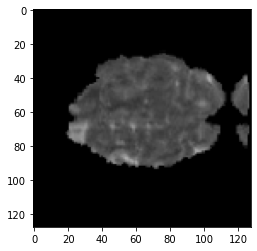

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
flair = mpimg.imread('test/aug_images/flair/augmented_image_1.png')

# Output Images
plt.imshow(flair)

In [4]:
flair.shape

(128, 128, 3)

In [7]:
import cv2
gray_flair=cv2.cvtColor(flair,cv2.COLOR_BGR2GRAY)

In [8]:
gray_flair.shape

(128, 128)

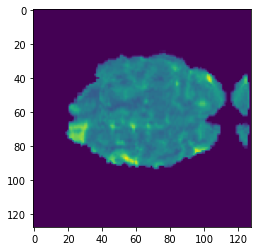

In [9]:
plt.imshow(gray_flair)

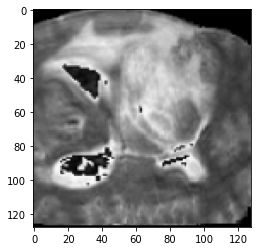

In [10]:
# Read Images
flair2 = mpimg.imread('test/aug_images/flair/augmented_image_2.png')

# Output Images
plt.imshow(flair2)

In [11]:
gray_flair2=cv2.cvtColor(flair2,cv2.COLOR_BGR2GRAY)

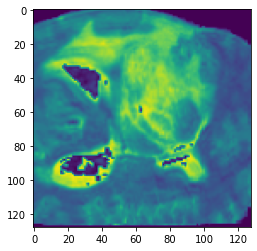

In [12]:
gray_flair2.shape
plt.imshow(gray_flair2)

In [29]:
flair_stack=np.stack((gray_flair, gray_flair2), axis=-1)

In [30]:
flair_stack.shape

(128, 128, 2)

In [33]:
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for i in range(128):
    flair = mpimg.imread('test/aug_images/flair/augmented_image_'+str(i+1)+'.png')
    gray_flair=cv2.cvtColor(flair,cv2.COLOR_BGR2GRAY)
    print(gray_flair.shape)
    
    if i==0:
        stacked_flair=gray_flair
        print(stacked_flair.shape)
        
    else:
        stacked_flair=np.dstack((stacked_flair, gray_flair))
        print(stacked_flair.shape)

(128, 128)
(128, 128)
(128, 128)
(128, 128, 2)
(128, 128)
(128, 128, 3)
(128, 128)
(128, 128, 4)
(128, 128)
(128, 128, 5)
(128, 128)
(128, 128, 6)
(128, 128)
(128, 128, 7)
(128, 128)
(128, 128, 8)
(128, 128)
(128, 128, 9)
(128, 128)
(128, 128, 10)
(128, 128)
(128, 128, 11)
(128, 128)
(128, 128, 12)
(128, 128)
(128, 128, 13)
(128, 128)
(128, 128, 14)
(128, 128)
(128, 128, 15)
(128, 128)
(128, 128, 16)
(128, 128)
(128, 128, 17)
(128, 128)
(128, 128, 18)
(128, 128)
(128, 128, 19)
(128, 128)
(128, 128, 20)
(128, 128)
(128, 128, 21)
(128, 128)
(128, 128, 22)
(128, 128)
(128, 128, 23)
(128, 128)
(128, 128, 24)
(128, 128)
(128, 128, 25)
(128, 128)
(128, 128, 26)
(128, 128)
(128, 128, 27)
(128, 128)
(128, 128, 28)
(128, 128)
(128, 128, 29)
(128, 128)
(128, 128, 30)
(128, 128)
(128, 128, 31)
(128, 128)
(128, 128, 32)
(128, 128)
(128, 128, 33)
(128, 128)
(128, 128, 34)
(128, 128)
(128, 128, 35)
(128, 128)
(128, 128, 36)
(128, 128)
(128, 128, 37)
(128, 128)
(128, 128, 38)
(128, 128)
(128, 128, 39

# Saving all images using cv2 in D drive

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
import random
import os
from scipy.ndimage import rotate
import cv2
import nibabel as nib

import albumentations as A

In [2]:
images_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/images/' #path to original images
masks_path = 'D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/masks/'
img_augmented_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/aug_images/' # path to store aumented images
msk_augmented_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/aug_masks/' # path to store aumented images
images=[] # to store paths of images from folder
masks=[]

In [3]:
for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

for msk in os.listdir(masks_path):  # read image name from folder and append its path into "images" array     
    masks.append(os.path.join(masks_path,msk))

In [7]:
for i in range(1,370):
    flair_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_'+str(i).zfill(3)+'/BraTS20_Training_'+str(i).zfill(3)+'_flair.nii'
    flair=nib.load(flair_path)
    flair = (flair.get_fdata())[:,:,:]
    flair = flair.astype(np.uint8)
    
    for j in range(13,141):
        filename = 'D:/BraT(nii)/BraTS2020_TrainingData/augmentation/images/flair/image_'+str(i)+'_slice_'+str(j-12)+'.png'
        flair2=flair[56:184,56:184,j]
        cv2.imwrite(filename,flair2)

In [4]:
flair_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'
flair=nib.load(flair_path)
flair = (flair.get_fdata())[:,:,:]
flair = flair.astype(np.uint8)
flair=flair[int(56):int(184),int(56):int(184),:]

filename = 'C:/Users/ADMIN/Desktop/BraT_(nii)/augmentation/images/flair/image_001_slice_001.png'
flair2=flair[:,:,1]
cv2.imwrite(filename,flair2)

False

In [5]:
flair_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'
img = nib.load(flair_path)
img = (img.get_fdata())[:,:,:]
img = img.astype(np.uint8)
img.shape

for i in range(13,141):
    filename = "augmentation/"+str(i-13)+".png"
    gray_img = img[56:184,56:184,i]
    cv2.imwrite(filename, gray_img)

In [13]:
 print(os.getcwd())

C:\Users\ADMIN\Desktop\BraT (nii)


# Create New Folders

In [20]:
for i in range(1,370):
    os.mkdir("augmentation/image_"+str(i))
    os.mkdir("augmentation/image_"+str(i)+"/flair/")
    os.mkdir("augmentation/image_"+str(i)+"/t1ce/")
    os.mkdir("augmentation/image_"+str(i)+"/t2/")

In [3]:
for i in range(1,370):
    os.mkdir("augmentation/image_"+str(i)+"/mask/")

# Save t1ce, t2 and flair

In [34]:
for i in range(1,370):
    flair_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_'+str(i).zfill(3)+'/BraTS20_Training_'+str(i).zfill(3)+'_flair.nii'
    flair = nib.load(flair_path)
    flair = (flair.get_fdata())[:,:,:]
    flair = flair.astype(np.uint8)

    for j in range(13,141):
        filename = "augmentation/image_"+str(i)+"/flair/"+str(j-12)+".png"
        flair2 = flair[56:184,56:184,j]
        cv2.imwrite(filename, flair2)

In [35]:
for i in range(1,370):
    t1ce_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_'+str(i).zfill(3)+'/BraTS20_Training_'+str(i).zfill(3)+'_t1ce.nii'
    t1ce = nib.load(t1ce_path)
    t1ce = (t1ce.get_fdata())[:,:,:]
    t1ce = t1ce.astype(np.uint8)

    for j in range(13,141):
        filename = "augmentation/image_"+str(i)+"/t1ce/"+str(j-12)+".png"
        t1ce2 = t1ce[56:184,56:184,j]
        cv2.imwrite(filename, t1ce2)

In [37]:
for i in range(1,370):
    t2_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_'+str(i).zfill(3)+'/BraTS20_Training_'+str(i).zfill(3)+'_t2.nii'
    t2 = nib.load(t2_path)
    t2 = (t2.get_fdata())[:,:,:]
    t2 = t2.astype(np.uint8)

    for j in range(13,141):
        filename = "augmentation/image_"+str(i)+"/t2/"+str(j-12)+".png"
        t22 = t2[56:184,56:184,j]
        cv2.imwrite(filename, t22)

# Save masks

In [2]:
import glob
import os

In [2]:
mask_list = sorted(glob.glob('D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [4]:
for i in range(1,2):
    mask_path= 'D:/BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_'+str(i).zfill(3)+'/BraTS20_Training_'+str(i).zfill(3)+'_seg.nii'
    t2 = nib.load(t2_path)
    t2 = (t2.get_fdata())[:,:,:]
    t2 = t2.astype(np.uint8)

    for j in range(13,141):
        filename = "augmentation/image_"+str(i)+"/mask/"+str(j-12)+".png"
        t22 = t2[56:184,56:184,j]
        cv2.imwrite(filename, t22)

In [33]:
masks_path = 'masks/'
masks=[]
for msk in os.listdir(masks_path):  # read image name from folder and append its path into "images" array     
    masks.append(os.path.join(masks_path,msk))

In [6]:
masks.sort()

In [34]:
for i in range(20):
    print(masks[i])

masks/mask_001.npy
masks/mask_002.npy
masks/mask_003.npy
masks/mask_004.npy
masks/mask_005.npy
masks/mask_006.npy
masks/mask_007.npy
masks/mask_008.npy
masks/mask_009.npy
masks/mask_010.npy
masks/mask_011.npy
masks/mask_012.npy
masks/mask_013.npy
masks/mask_014.npy
masks/mask_015.npy
masks/mask_016.npy
masks/mask_017.npy
masks/mask_018.npy
masks/mask_019.npy
masks/mask_020.npy


In [35]:
import numpy as np
import matplotlib.image

for i in range(369):
    mask=np.load(masks[i])
    mask = np.argmax(mask, axis=3)
    mask=mask.astype(np.uint8)
    
    for j in range(128):
        matplotlib.image.imsave('augmentation/image_'+str(i+1)+'/mask/'+str(j+1)+'.png', mask[:,:,j])

# Augmentation

In [14]:
for i in range(1,370):
    os.mkdir("augmented/image_"+str(i))
    os.mkdir("augmented/image_"+str(i)+"/flair/")
    os.mkdir("augmented/image_"+str(i)+"/t1ce/")
    os.mkdir("augmented/image_"+str(i)+"/t2/")
    os.mkdir("augmented/image_"+str(i)+"/masks/")

In [1]:
images_to_generate=128

for j in range(1,370):
    images_path='augmentation/image_'+str(j)+'/t2/' #path to original images
    images_path1='augmentation/image_'+str(j)+'/flair/' #path to original images
    images_path2='augmentation/image_'+str(j)+'/t1ce/' #path to original images
    masks_path = 'augmentation/image_'+str(j)+'/mask/'
    img_augmented_path='augmented/image_'+str(j)+'/t2/' # path to store aumented images
    img_augmented_path1='augmented/image_'+str(j)+'/flair/' # path to store aumented images
    img_augmented_path2='augmented/image_'+str(j)+'/t1ce/' # path to store aumented images
    msk_augmented_path='augmented/image_'+str(j)+'/masks/' # path to store aumented images
    images=[] # to store paths of images from folder
    images1=[] # to store paths of images from folder
    images2=[] # to store paths of images from folder
    masks=[]

    for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
        images.append(os.path.join(images_path,im))

    for im in os.listdir(images_path1):  # read image name from folder and append its path into "images" array     
        images1.append(os.path.join(images_path1,im))

    for im in os.listdir(images_path2):  # read image name from folder and append its path into "images" array     
        images2.append(os.path.join(images_path2,im))


    for msk in os.listdir(masks_path):  # read image name from folder and append its path into "images" array     
        masks.append(os.path.join(masks_path,msk))

    aug = A.Compose([
        A.VerticalFlip(p=0.5),              
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=1),
        A.Transpose(p=1),
        #A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.GridDistortion(p=1)
        ],
        additional_targets={'image1': 'image', 'image2': 'image'}
    )

    i=1   # variable to iterate till images_to_generate
    import cv2

    while i<=images_to_generate: 
        #number = random.randint(0, len(images)-1)  #PIck a number to select an image & mask
        number=i
        image = images[number]
        image1 = images1[number]
        image2 = images2[number]
        mask = masks[number]
        print(image, mask)
        print(image1, mask)
        print(image2, mask)
        #image=random.choice(images) #Randomly select an image name
        original_image = cv2.imread(image)
        original_image1 = cv2.imread(image1)
        original_image2 = cv2.imread(image2)
        original_mask = cv2.imread(mask)

        aug_input={"image":original_image, "image2":original_image2,"image1":original_image1, "mask":original_mask}
        augmented = aug(**aug_input)
        transformed_image = augmented['image']
        transformed_image1 = augmented['image1']
        transformed_image2 = augmented['image2']
        transformed_mask = augmented['mask']


        new_image_path= "%s/augmented_image_%s.png" %(img_augmented_path, i)
        new_image_path1= "%s/augmented_image_%s.png" %(img_augmented_path1, i)
        new_image_path2= "%s/augmented_image_%s.png" %(img_augmented_path2, i)
        new_mask_path = "%s/augmented_mask_%s.png" %(msk_augmented_path, i)
        io.imsave(new_image_path, transformed_image)
        io.imsave(new_image_path1, transformed_image)
        io.imsave(new_image_path2, transformed_image2)
        io.imsave(new_mask_path, transformed_mask)
        i =i+1

NameError: name 'os' is not defined

# Convert back to numpy array

In [26]:
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for j in range(1,2):
    for i in range(128):
        flair = mpimg.imread('augmented/image_'+str(j)+'/flair/augmented_image_'+str(i+1)+'.png')
        gray_flair=cv2.cvtColor(flair,cv2.COLOR_BGR2GRAY)
        print(gray_flair.shape)

        if i==0:
            stacked_flair=gray_flair
            print(stacked_flair.shape)

        else:
            stacked_flair=np.dstack((stacked_flair, gray_flair))
            print(stacked_flair.shape)
            
    for i in range(128):
        t2 = mpimg.imread('augmented/image_'+str(j)+'/t2/augmented_image_'+str(i+1)+'.png')
        gray_t2=cv2.cvtColor(t2,cv2.COLOR_BGR2GRAY)
        print(t2.shape)

        if i==0:
            stacked_t2=gray_t2
            print(stacked_t2.shape)

        else:
            stacked_t2=np.dstack((stacked_t2, gray_t2))
            print(stacked_t2.shape)
    
    for i in range(128):
        t2 = mpimg.imread('augmented/image_'+str(j)+'/t2/augmented_image_'+str(i+1)+'.png')
        gray_t2=cv2.cvtColor(t2,cv2.COLOR_BGR2GRAY)
        print(t2.shape)

        if i==0:
            stacked_t2=gray_t2
            print(stacked_t2.shape)

        else:
            stacked_t2=np.dstack((stacked_t2, gray_t2))
            print(stacked_t2.shape)
            
    for i in range(128):
        t1ce = mpimg.imread('augmented/image_'+str(j)+'/t1ce/augmented_image_'+str(i+1)+'.png')
        gray_t1ce=cv2.cvtColor(t1ce,cv2.COLOR_BGR2GRAY)
        print(t1ce.shape)

        if i==0:
            stacked_t1ce=gray_t1ce
            print(stacked_t1ce.shape)

        else:
            stacked_t1ce=np.dstack((stacked_t1ce, gray_t1ce))
            print(stacked_t1ce.shape)
            
    temp_combined_images = np.stack([stacked_flair,stacked_t1ce,stacked_t2], axis=3)
    print(temp_combined_images.shape)
    np.save('augmented_array/images/image_'+str(j+368).zfill(3)+'.npy', temp_combined_images)

(128, 128)
(128, 128)
(128, 128)
(128, 128, 2)
(128, 128)
(128, 128, 3)
(128, 128)
(128, 128, 4)
(128, 128)
(128, 128, 5)
(128, 128)
(128, 128, 6)
(128, 128)
(128, 128, 7)
(128, 128)
(128, 128, 8)
(128, 128)
(128, 128, 9)
(128, 128)
(128, 128, 10)
(128, 128)
(128, 128, 11)
(128, 128)
(128, 128, 12)
(128, 128)
(128, 128, 13)
(128, 128)
(128, 128, 14)
(128, 128)
(128, 128, 15)
(128, 128)
(128, 128, 16)
(128, 128)
(128, 128, 17)
(128, 128)
(128, 128, 18)
(128, 128)
(128, 128, 19)
(128, 128)
(128, 128, 20)
(128, 128)
(128, 128, 21)
(128, 128)
(128, 128, 22)
(128, 128)
(128, 128, 23)
(128, 128)
(128, 128, 24)
(128, 128)
(128, 128, 25)
(128, 128)
(128, 128, 26)
(128, 128)
(128, 128, 27)
(128, 128)
(128, 128, 28)
(128, 128)
(128, 128, 29)
(128, 128)
(128, 128, 30)
(128, 128)
(128, 128, 31)
(128, 128)
(128, 128, 32)
(128, 128)
(128, 128, 33)
(128, 128)
(128, 128, 34)
(128, 128)
(128, 128, 35)
(128, 128)
(128, 128, 36)
(128, 128)
(128, 128, 37)
(128, 128)
(128, 128, 38)
(128, 128)
(128, 128, 39

(128, 128, 3)
(128, 128, 59)
(128, 128, 3)
(128, 128, 60)
(128, 128, 3)
(128, 128, 61)
(128, 128, 3)
(128, 128, 62)
(128, 128, 3)
(128, 128, 63)
(128, 128, 3)
(128, 128, 64)
(128, 128, 3)
(128, 128, 65)
(128, 128, 3)
(128, 128, 66)
(128, 128, 3)
(128, 128, 67)
(128, 128, 3)
(128, 128, 68)
(128, 128, 3)
(128, 128, 69)
(128, 128, 3)
(128, 128, 70)
(128, 128, 3)
(128, 128, 71)
(128, 128, 3)
(128, 128, 72)
(128, 128, 3)
(128, 128, 73)
(128, 128, 3)
(128, 128, 74)
(128, 128, 3)
(128, 128, 75)
(128, 128, 3)
(128, 128, 76)
(128, 128, 3)
(128, 128, 77)
(128, 128, 3)
(128, 128, 78)
(128, 128, 3)
(128, 128, 79)
(128, 128, 3)
(128, 128, 80)
(128, 128, 3)
(128, 128, 81)
(128, 128, 3)
(128, 128, 82)
(128, 128, 3)
(128, 128, 83)
(128, 128, 3)
(128, 128, 84)
(128, 128, 3)
(128, 128, 85)
(128, 128, 3)
(128, 128, 86)
(128, 128, 3)
(128, 128, 87)
(128, 128, 3)
(128, 128, 88)
(128, 128, 3)
(128, 128, 89)
(128, 128, 3)
(128, 128, 90)
(128, 128, 3)
(128, 128, 91)
(128, 128, 3)
(128, 128, 92)
(128, 128, 3)


In [38]:
image_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/images/image_0.npy'
mask_path='D:/BraT(nii)/BraTS2020_TrainingData/input_data_3channels/masks/mask_0.npy'

image=np.load(image_path)
image.shape


(128, 128, 128, 3)

In [37]:
mask=np.load(mask_path)
mask.shape

(128, 128, 128, 4)

In [41]:
import cv2

mask='C:/Users/ADMIN/Desktop/BraT (nii)/augmentation/image_1/mask/1.png'
mask=cv2.imread(mask)
gray_mask=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
gray_mask.shape

(128, 128)

In [43]:
temp_mask=gray_mask.astype(np.uint8)

In [44]:
from tensorflow.keras.utils import to_categorical

temp_mask= to_categorical(temp_mask, num_classes=4)

ImportError: cannot import name 'descriptor' from 'google.protobuf' (unknown location)

In [53]:
import nibabel as nib
import tensorflow
from tensorflow.keras.utils import to_categorical

ImportError: cannot import name 'descriptor' from 'google.protobuf' (unknown location)

In [46]:
mask_list = sorted(glob.glob('D:BraT(nii)/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [51]:
temp_mask=nib.load(mask_list[1]).get_fdata()
temp_mask=temp_mask.astype(np.uint8)
temp_mask = temp_mask[56:184, 56:184, 13:141]
temp_mask= to_categorical(temp_mask, num_classes=4)
temp_mask.shape

NameError: name 'to_categorical' is not defined